# Early stage diabetes risk prediction

Data Source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join('datasets', 'diabetes_data_upload.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
df.shape

(520, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

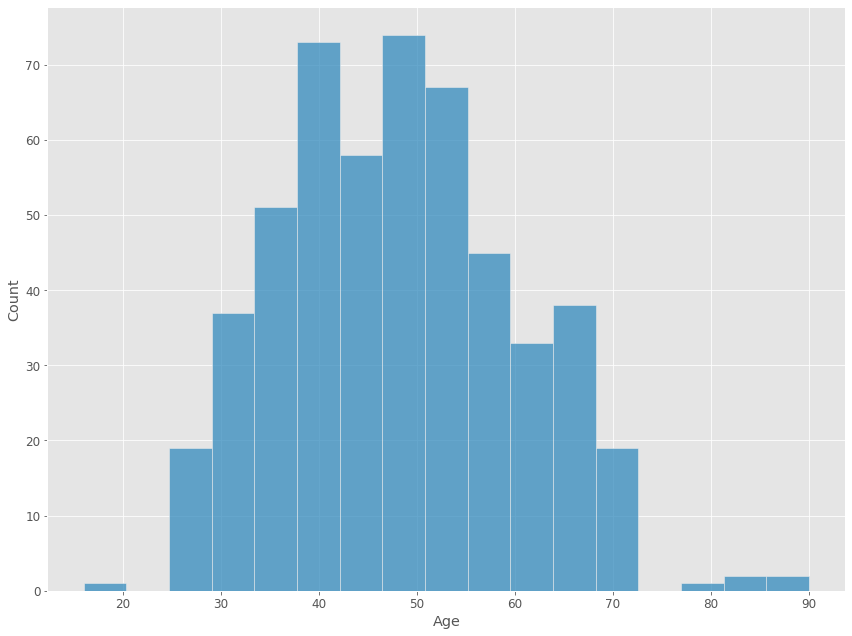

In [7]:
sns.histplot(df['Age'])

Helper Functions

In [8]:
def plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None):

    # create figure and axis
    fig, ax = plt.subplots()
    
    # plot bar charts
    sns.barplot(x=x, y=y, hue=hue, data=data, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar


def plot_pie(df, x, height, shadow=None, startangle=None, title=None):

    # initiate matplot figure
    fig1, ax1 = plt.subplots()

    # plot pie
    ax1.pie(x=height, labels=x, autopct='%1.1f%%', shadow=shadow, startangle=startangle, data=df)

    # label plot
    ax1.set(title=title) 

    return plot_pie

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

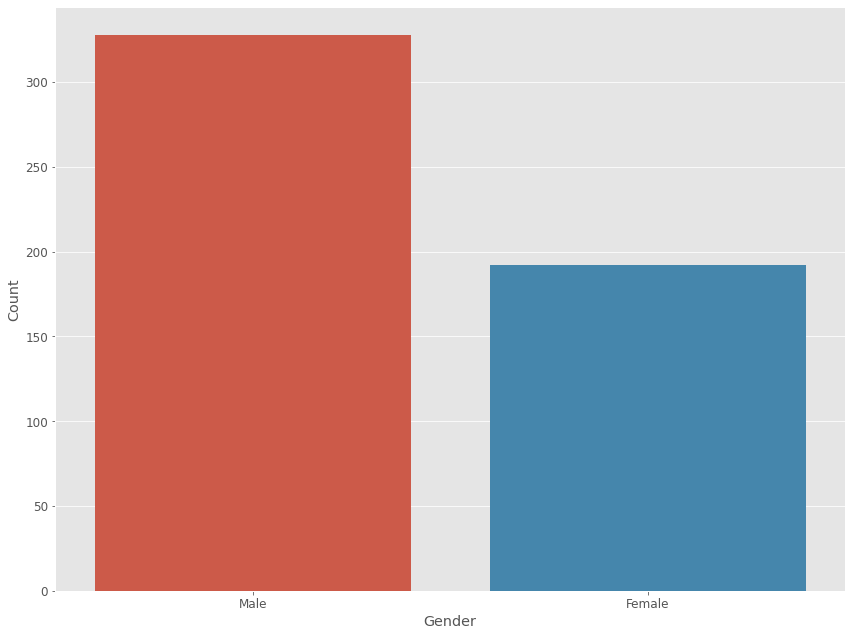

In [9]:
plot_bar(
    x=df['Gender'].value_counts().keys(), y=df['Gender'].value_counts().values, data=df,
    xlabel='Gender', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

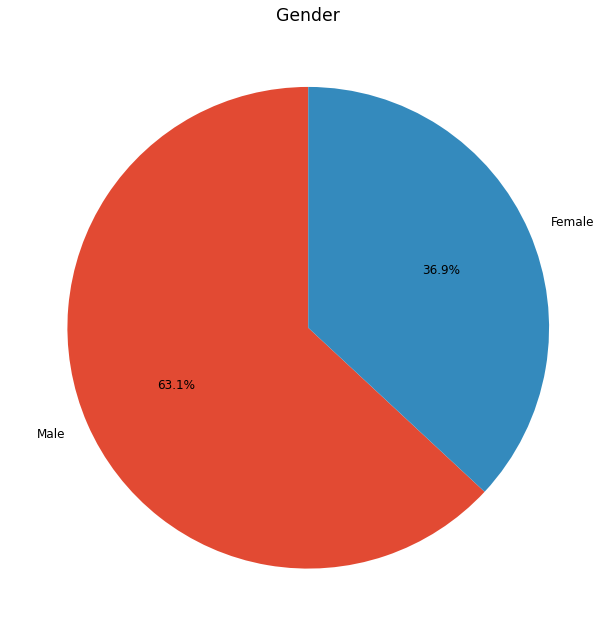

In [10]:
plot_pie(
    df=df, 
    x=df['Gender'].value_counts().keys(), height=df['Gender'].value_counts(normalize=True).values, startangle=90,
    title='Gender'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

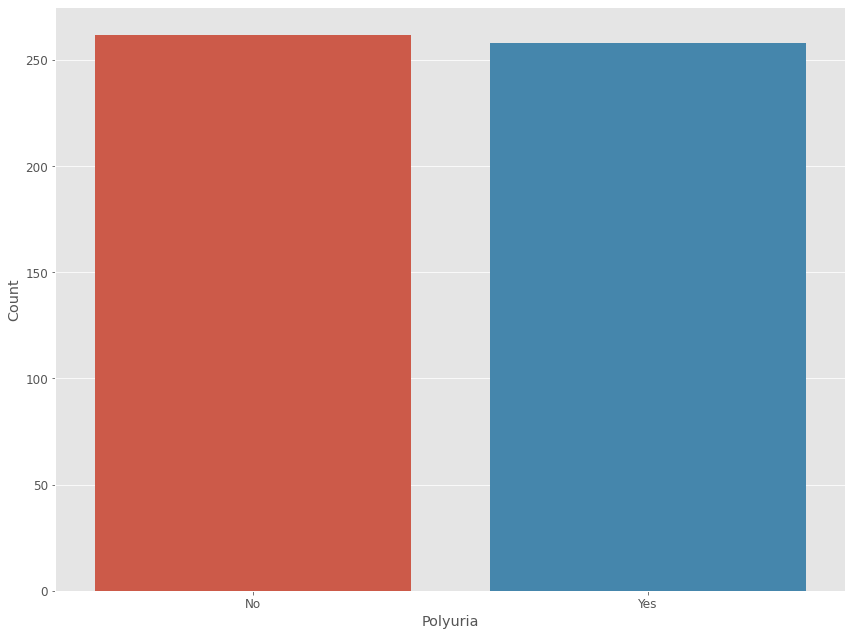

In [11]:
plot_bar(
    x=df['Polyuria'].value_counts().keys(), y=df['Polyuria'].value_counts().values, data=df,
    xlabel='Polyuria', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

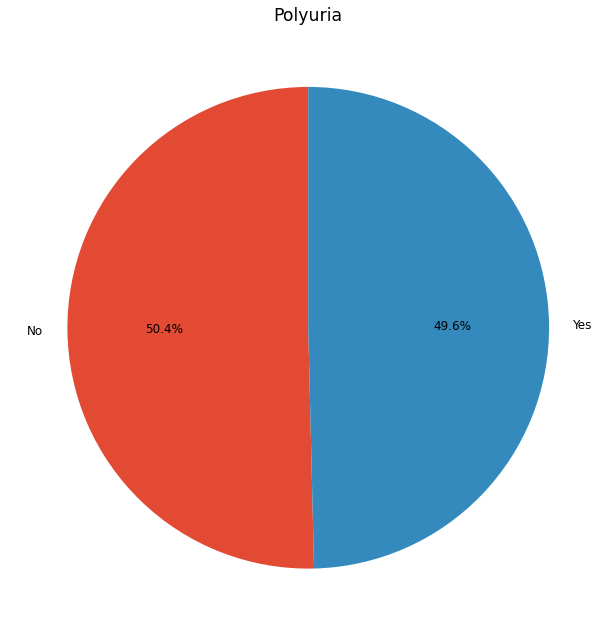

In [12]:
plot_pie(
    df=df, 
    x=df['Polyuria'].value_counts().keys(), height=df['Polyuria'].value_counts(normalize=True).values, startangle=90,
    title='Polyuria'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

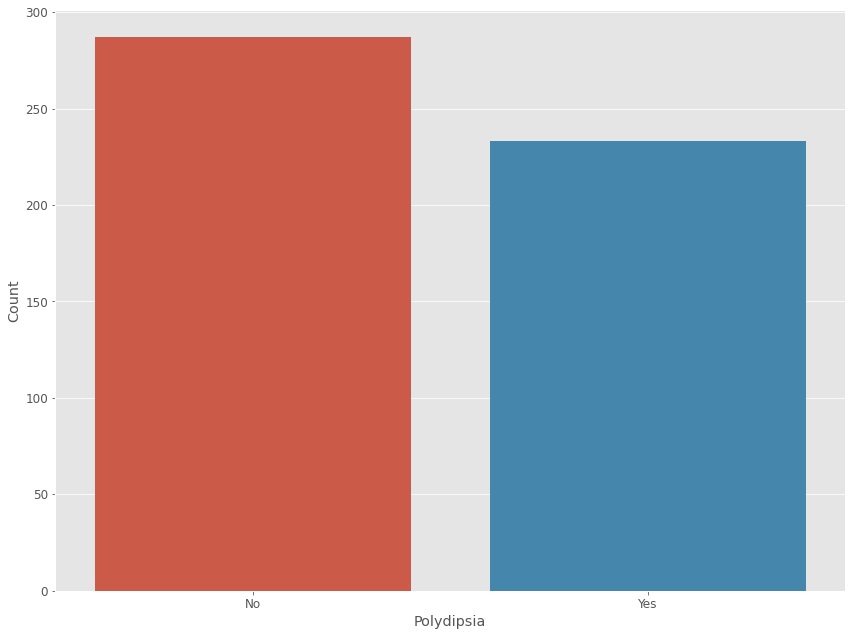

In [13]:
plot_bar(
    x=df['Polydipsia'].value_counts().keys(), y=df['Polydipsia'].value_counts().values, data=df,
    xlabel='Polydipsia', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

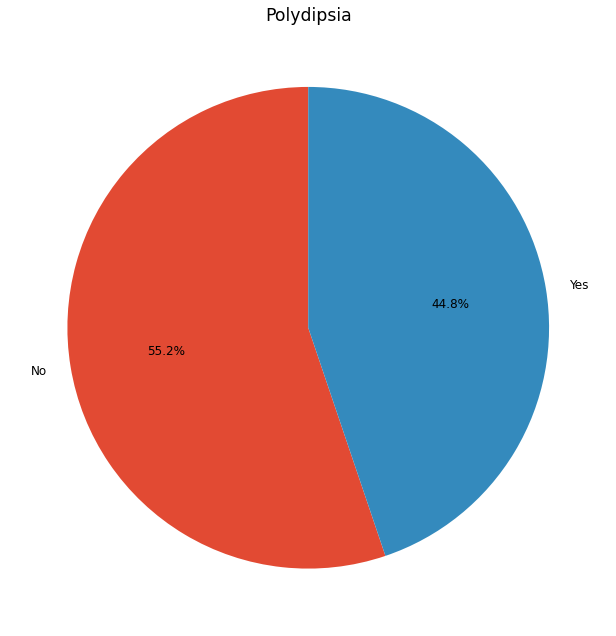

In [14]:
plot_pie(
    df=df, 
    x=df['Polydipsia'].value_counts().keys(), height=df['Polydipsia'].value_counts(normalize=True).values, startangle=90,
    title='Polydipsia'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

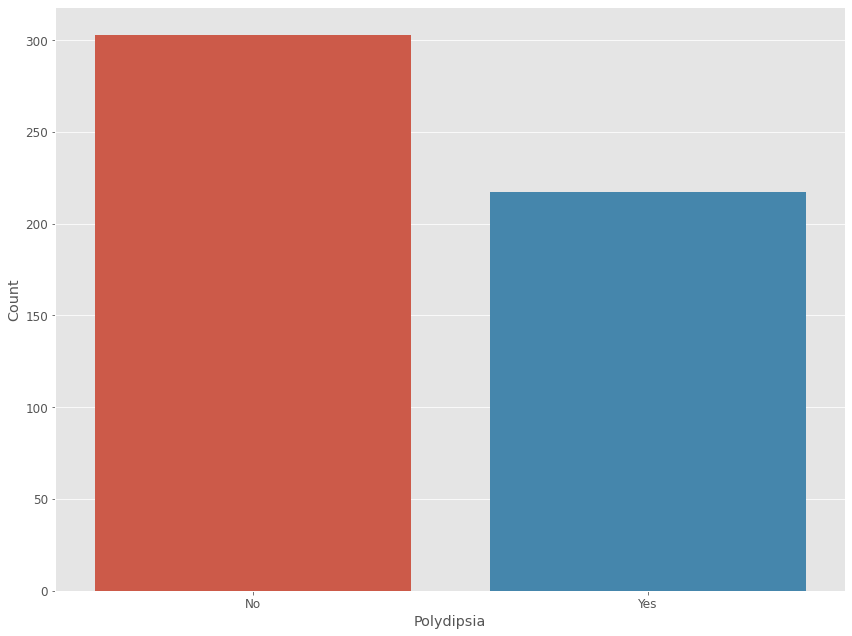

In [15]:
plot_bar(
    x=df['sudden weight loss'].value_counts().keys(), y=df['sudden weight loss'].value_counts().values, data=df,
    xlabel='Polydipsia', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

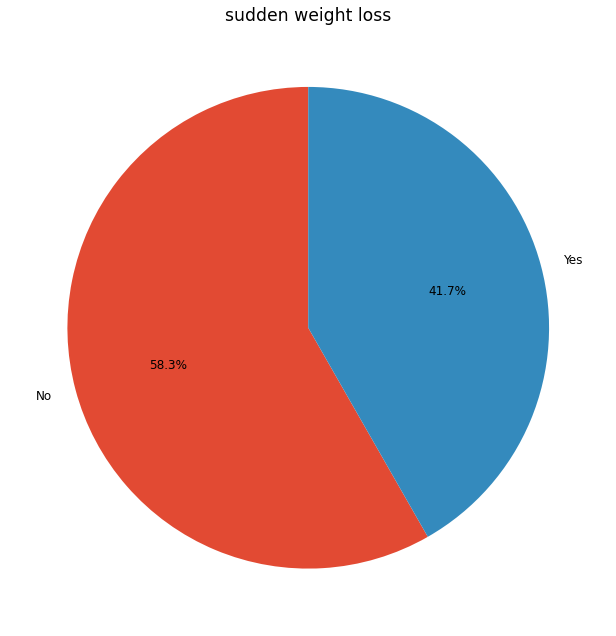

In [16]:
plot_pie(
    df=df, 
    x=df['sudden weight loss'].value_counts().keys(), height=df['sudden weight loss'].value_counts(normalize=True).values, startangle=90,
    title='sudden weight loss'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

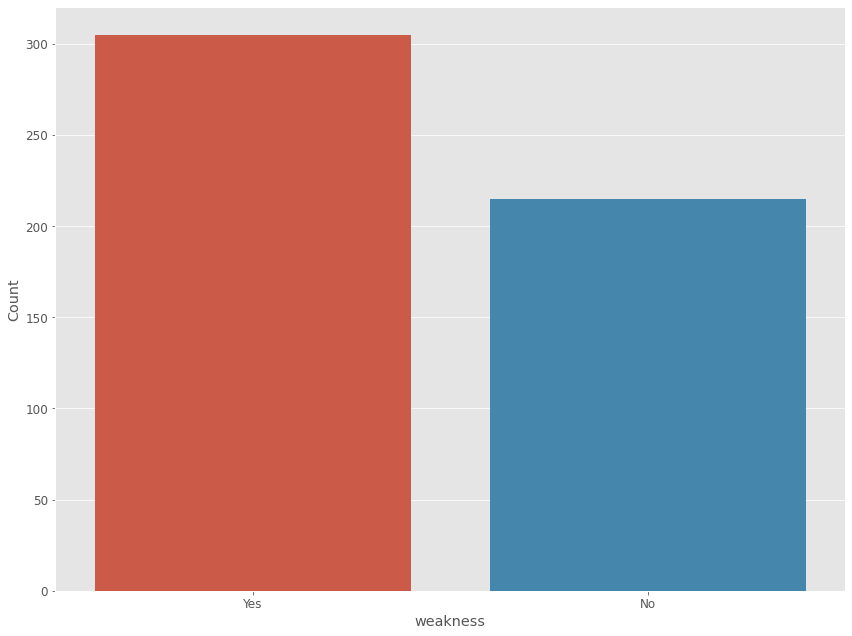

In [17]:
plot_bar(
    x=df['weakness'].value_counts().keys(), y=df['weakness'].value_counts().values, data=df,
    xlabel='weakness', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

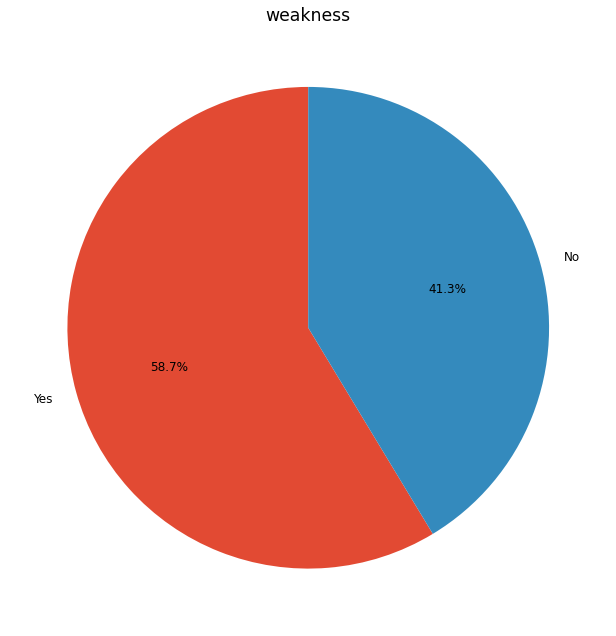

In [18]:
plot_pie(
    df=df, 
    x=df['weakness'].value_counts().keys(), height=df['weakness'].value_counts(normalize=True).values, startangle=90,
    title='weakness'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

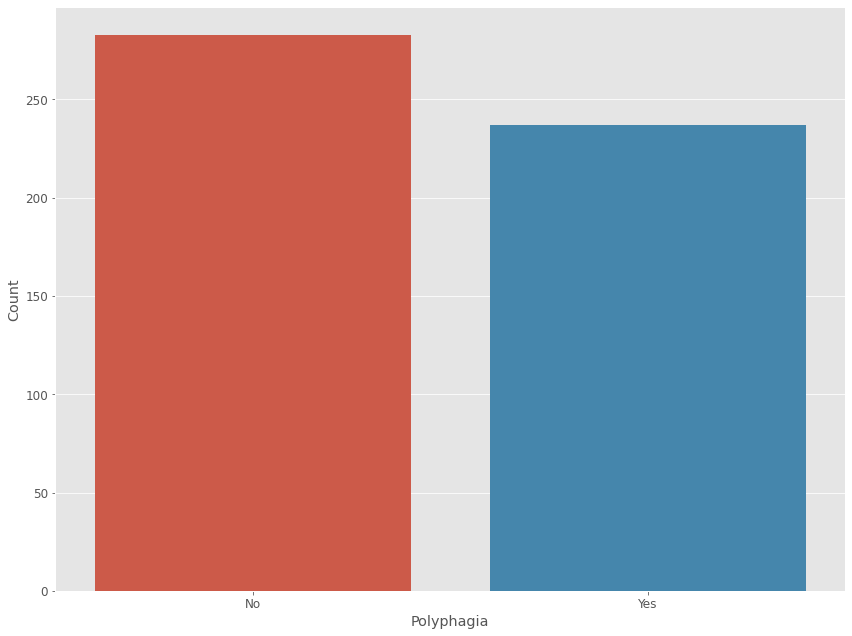

In [19]:
plot_bar(
    x=df['Polyphagia'].value_counts().keys(), y=df['Polyphagia'].value_counts().values, data=df,
    xlabel='Polyphagia', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

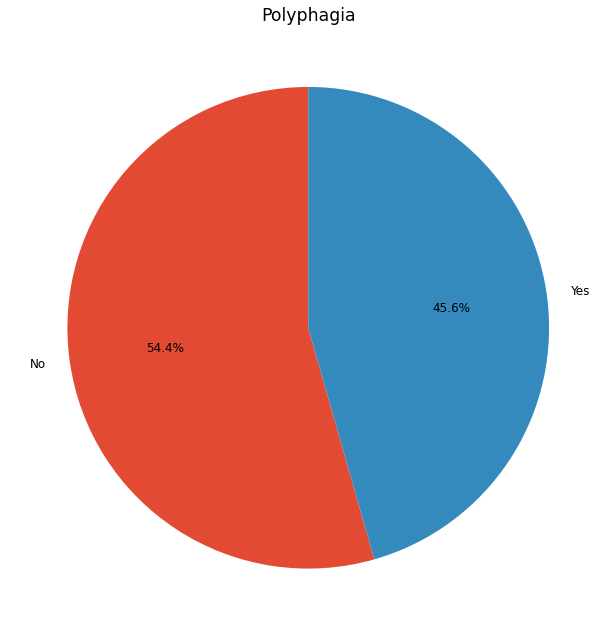

In [20]:
plot_pie(
    df=df, 
    x=df['Polyphagia'].value_counts().keys(), height=df['Polyphagia'].value_counts(normalize=True).values, startangle=90,
    title='Polyphagia'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

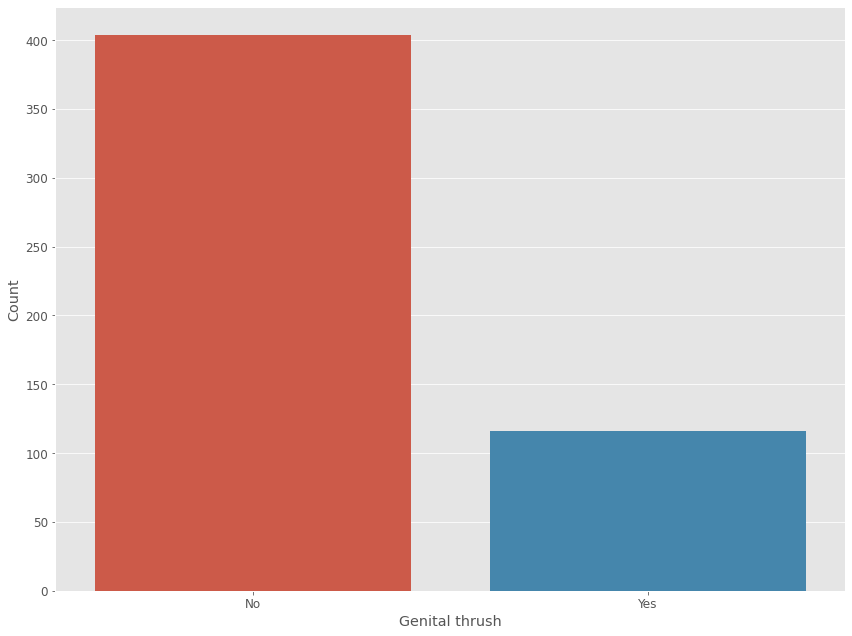

In [21]:
plot_bar(
    x=df['Genital thrush'].value_counts().keys(), y=df['Genital thrush'].value_counts().values, data=df,
    xlabel='Genital thrush', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

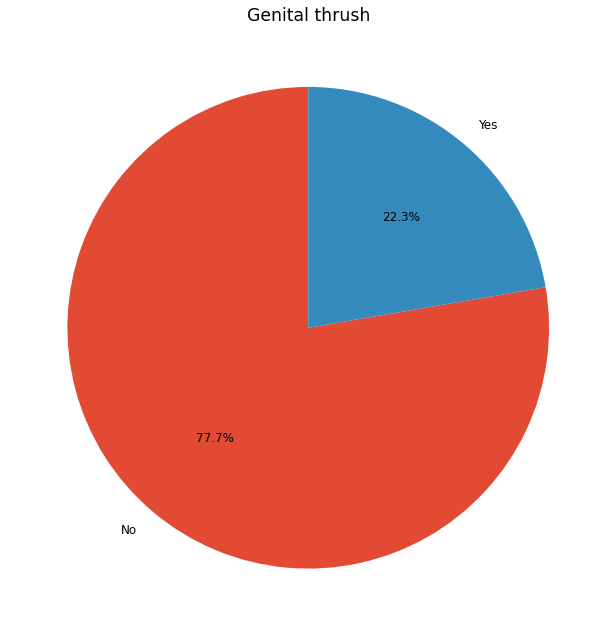

In [22]:
plot_pie(
    df=df, 
    x=df['Genital thrush'].value_counts().keys(), height=df['Genital thrush'].value_counts(normalize=True).values, startangle=90,
    title='Genital thrush'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

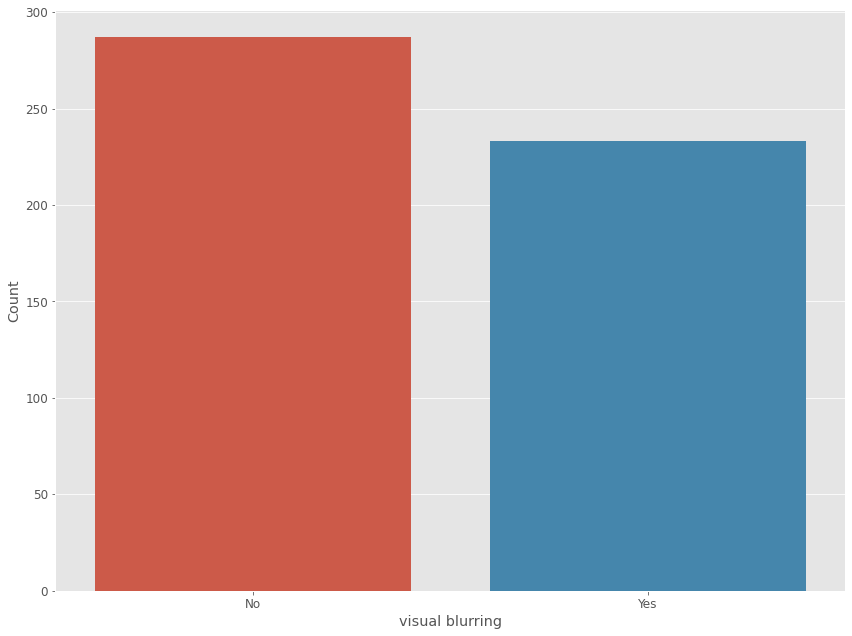

In [23]:
plot_bar(
    x=df['visual blurring'].value_counts().keys(), y=df['visual blurring'].value_counts().values, data=df,
    xlabel='visual blurring', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

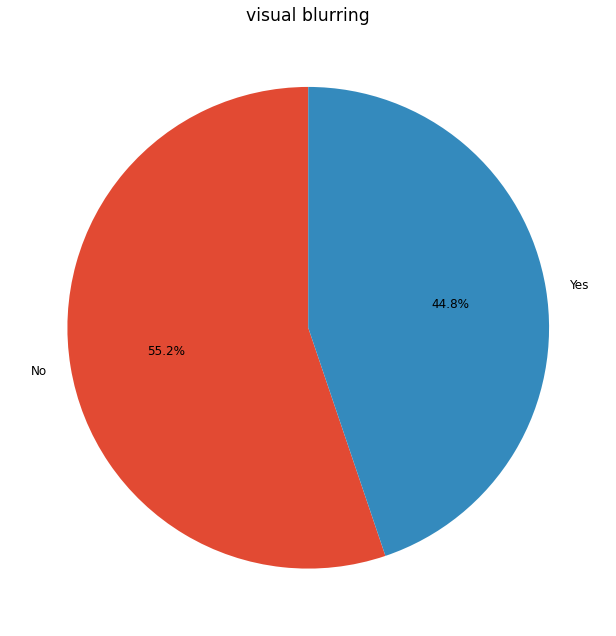

In [24]:
plot_pie(
    df=df, 
    x=df['visual blurring'].value_counts().keys(), height=df['visual blurring'].value_counts(normalize=True).values, startangle=90,
    title='visual blurring'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

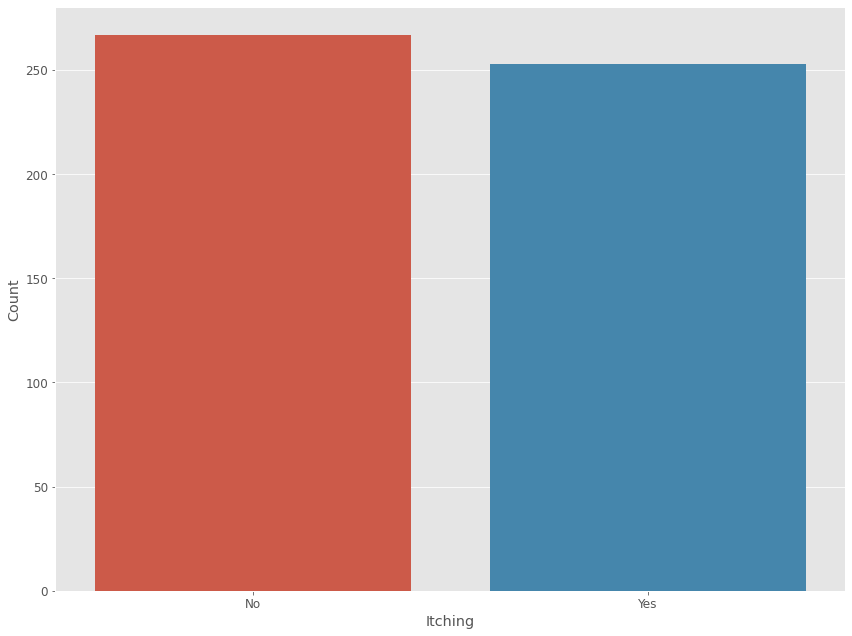

In [25]:
plot_bar(
    x=df['Itching'].value_counts().keys(), y=df['Itching'].value_counts().values, data=df,
    xlabel='Itching', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

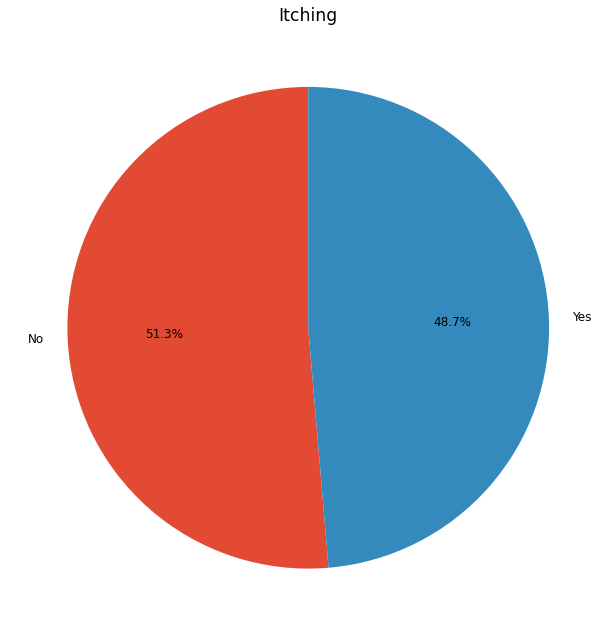

In [26]:
plot_pie(
    df=df, 
    x=df['Itching'].value_counts().keys(), height=df['Itching'].value_counts(normalize=True).values, startangle=90,
    title='Itching'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

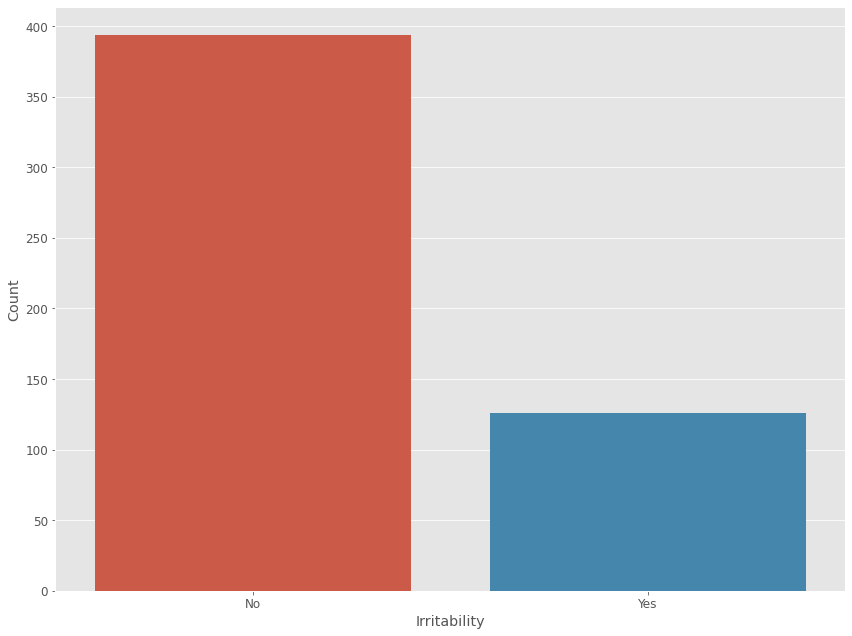

In [27]:
plot_bar(
    x=df['Irritability'].value_counts().keys(), y=df['Irritability'].value_counts().values, data=df,
    xlabel='Irritability', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

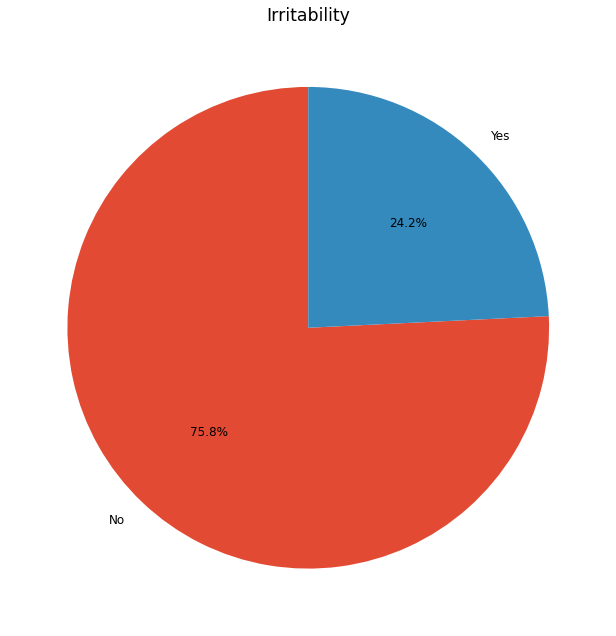

In [28]:
plot_pie(
    df=df, 
    x=df['Irritability'].value_counts().keys(), height=df['Irritability'].value_counts(normalize=True).values, startangle=90,
    title='Irritability'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

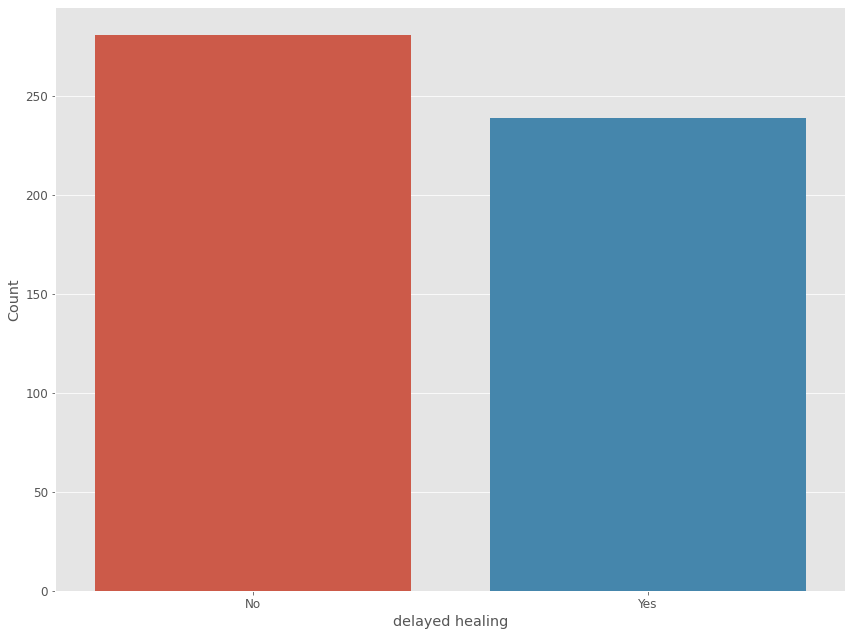

In [29]:
plot_bar(
    x=df['delayed healing'].value_counts().keys(), y=df['delayed healing'].value_counts().values, data=df,
    xlabel='delayed healing', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

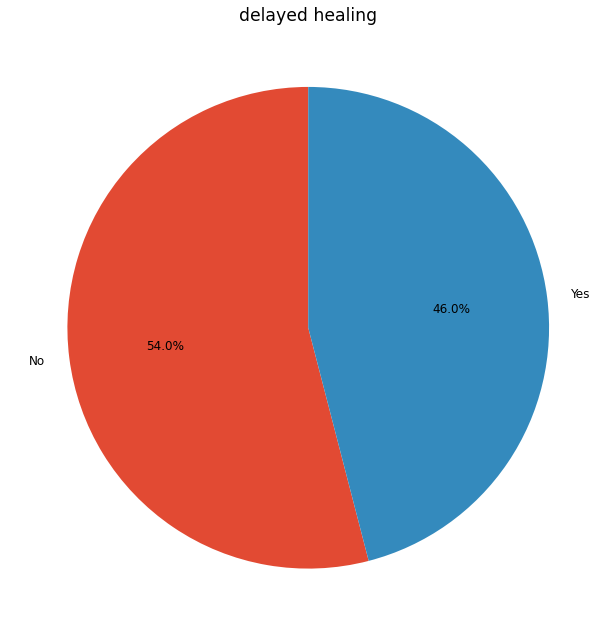

In [30]:
plot_pie(
    df=df, 
    x=df['delayed healing'].value_counts().keys(), height=df['delayed healing'].value_counts(normalize=True).values, startangle=90,
    title='delayed healing'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

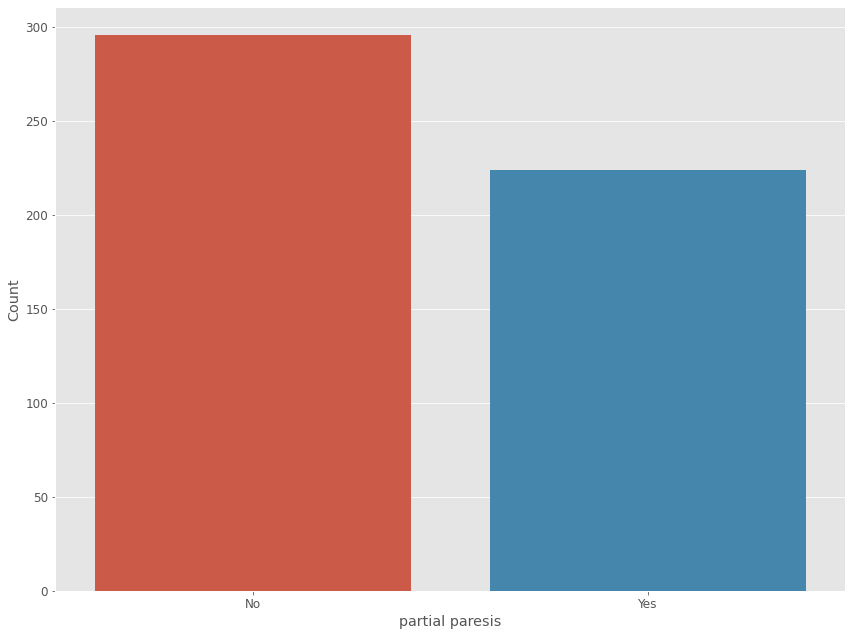

In [31]:
plot_bar(
    x=df['partial paresis'].value_counts().keys(), y=df['partial paresis'].value_counts().values, data=df,
    xlabel='partial paresis', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

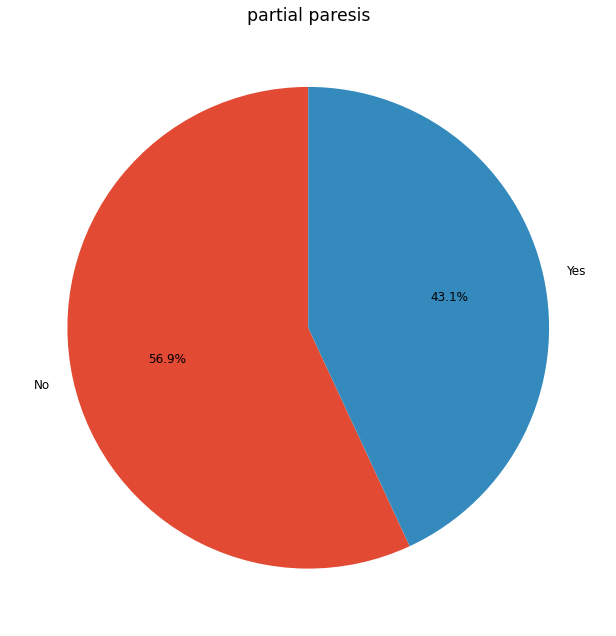

In [32]:
plot_pie(
    df=df, 
    x=df['partial paresis'].value_counts().keys(), height=df['partial paresis'].value_counts(normalize=True).values, startangle=90,
    title='partial paresis'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

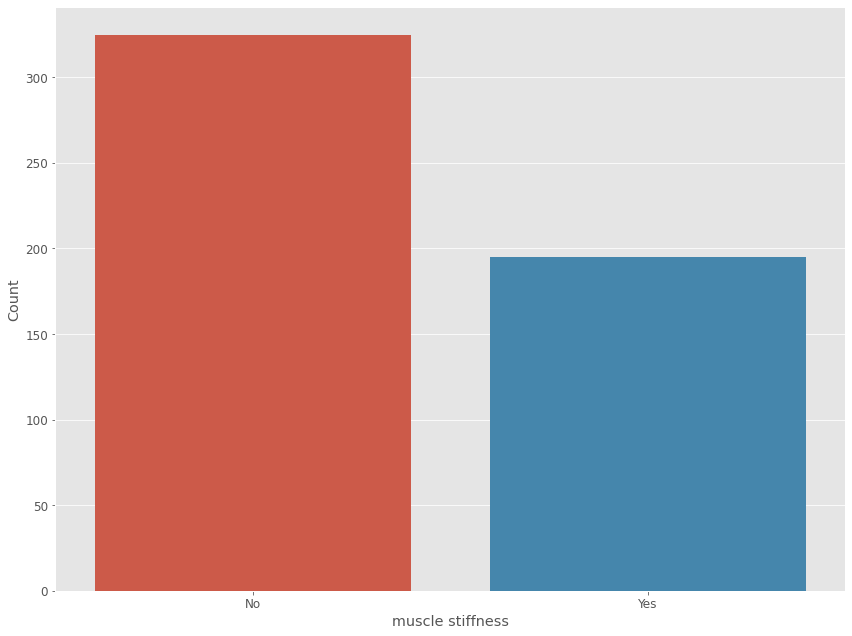

In [33]:
plot_bar(
    x=df['muscle stiffness'].value_counts().keys(), y=df['muscle stiffness'].value_counts().values, data=df,
    xlabel='muscle stiffness', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

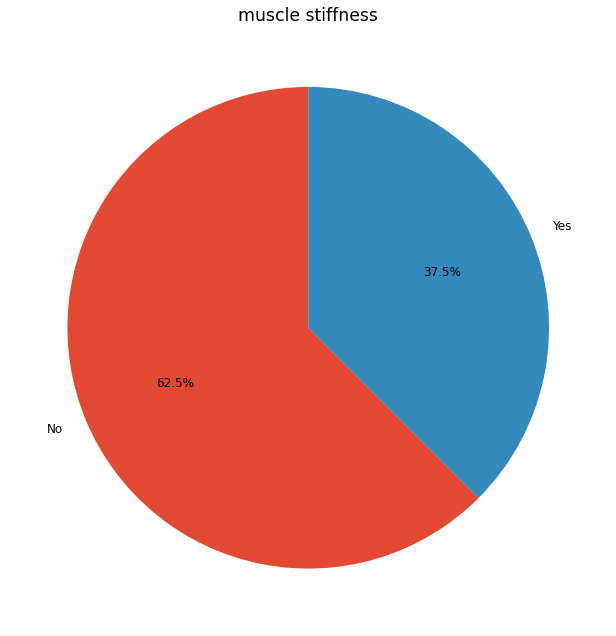

In [34]:
plot_pie(
    df=df, 
    x=df['muscle stiffness'].value_counts().keys(), height=df['muscle stiffness'].value_counts(normalize=True).values, startangle=90,
    title='muscle stiffness'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

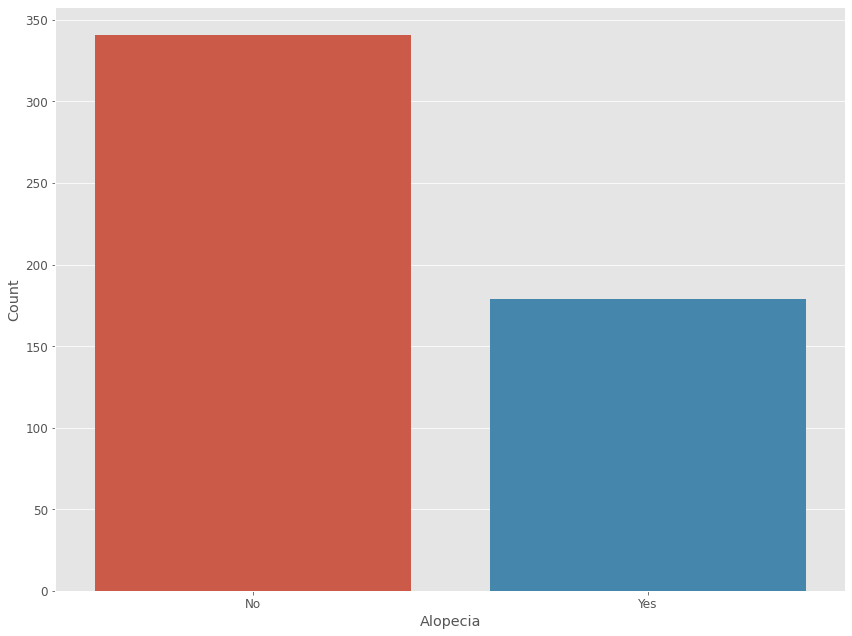

In [35]:
plot_bar(
    x=df['Alopecia'].value_counts().keys(), y=df['Alopecia'].value_counts().values, data=df,
    xlabel='Alopecia', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

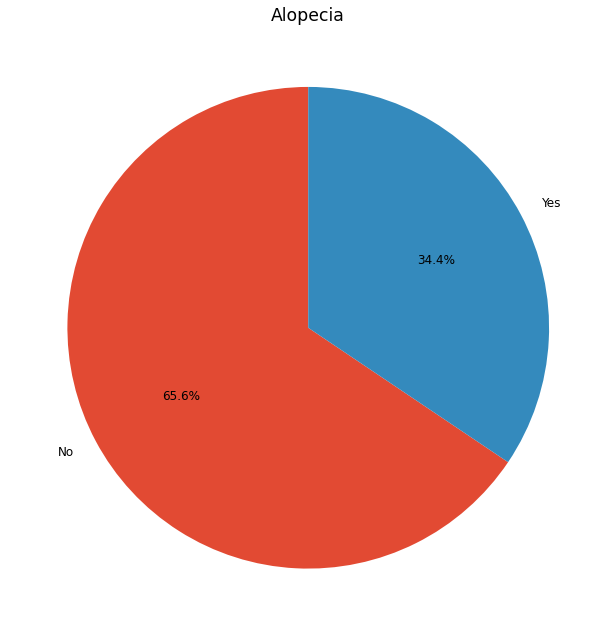

In [36]:
plot_pie(
    df=df, 
    x=df['Alopecia'].value_counts().keys(), height=df['Alopecia'].value_counts(normalize=True).values, startangle=90,
    title='Alopecia'
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

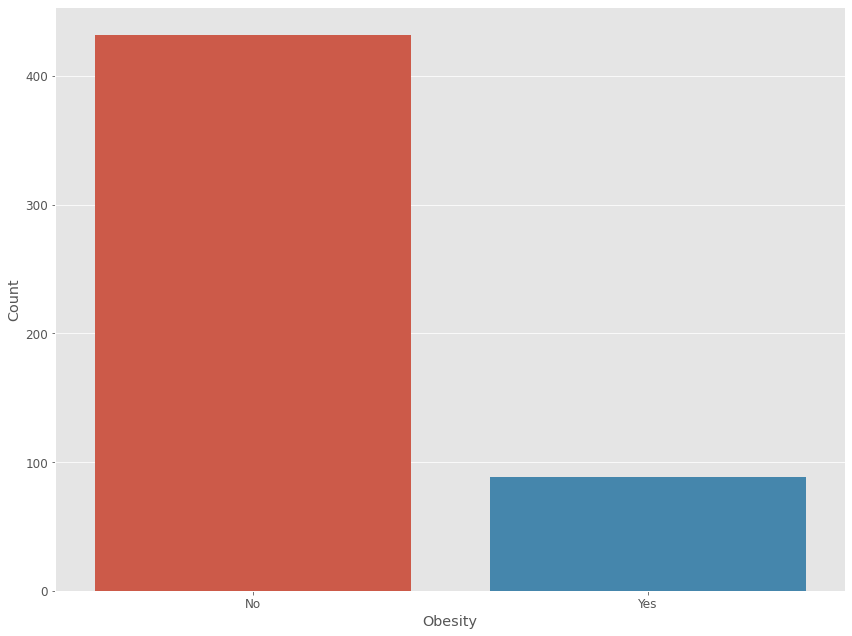

In [37]:
plot_bar(
    x=df['Obesity'].value_counts().keys(), y=df['Obesity'].value_counts().values, data=df,
    xlabel='Obesity', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

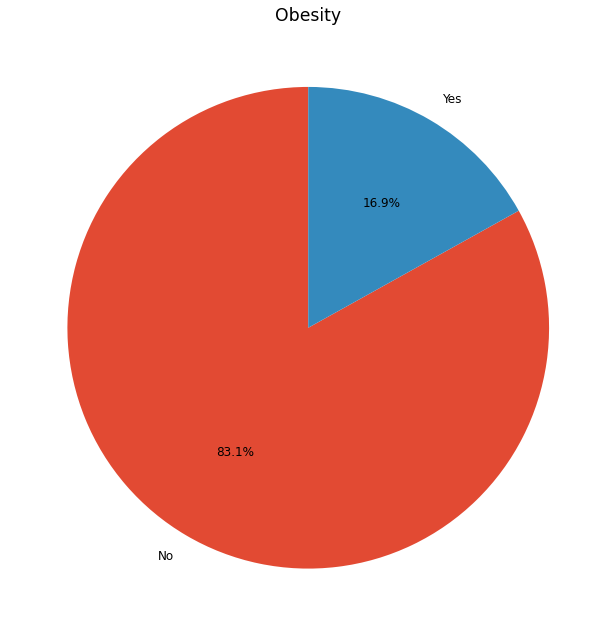

In [38]:
plot_pie(
    df=df, 
    x=df['Obesity'].value_counts().keys(), height=df['Obesity'].value_counts(normalize=True).values, startangle=90,
    title='Obesity'
)

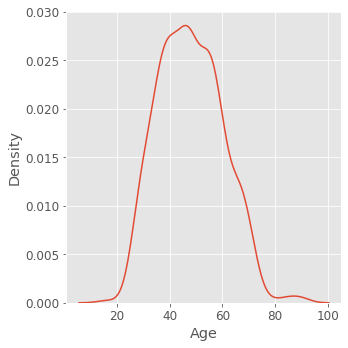

In [39]:
sns.displot(df['Age'] ,kind='kde')

Age categories, 0-24 => 1, 25-34 => 2, 35-44 => 3, 45-54 => 4, 55-64 => 5, 65 and over => 6

In [40]:
df['AgeCat'] = pd.cut(df['Age'], [0, 24, 34, 44, 54, 64, np.inf], labels=[1, 2, 3, 4, 5, 6])
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,AgeCat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,3
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,5
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,3
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,4
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,5


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

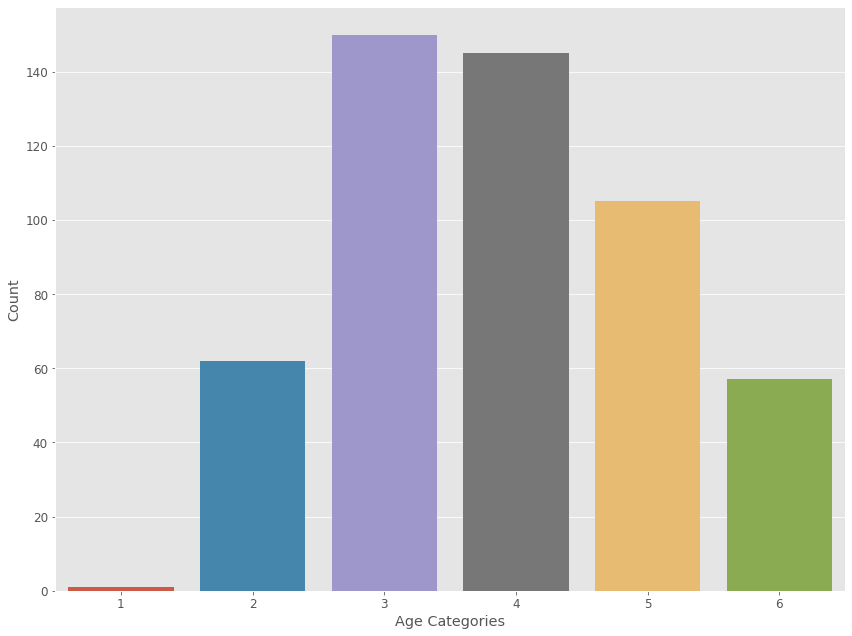

In [41]:
plot_bar(
    x=df['AgeCat'].value_counts().keys(), y=df['AgeCat'].value_counts().values, data=df, 
    xlabel='Age Categories', ylabel='Count'
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

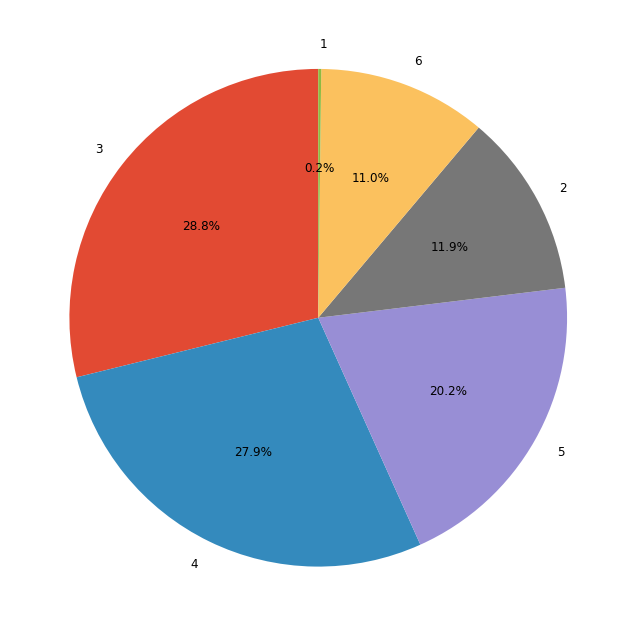

In [42]:
plot_pie(
    df=df,
    x=df['AgeCat'].value_counts().keys(), height=df['AgeCat'].value_counts(normalize=True).values, startangle=90
)

# Missing Values Exploration

In [43]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
AgeCat                0
dtype: int64

# Data Splitting

In [44]:
from sklearn.model_selection import train_test_split

# select feature and target columns
feature_columns = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                   'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'] 

target_column = ['class']

X, y = df[feature_columns], df[target_column]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features dimension: {0} ==> Target dimensions: {1}'.format(X.shape, y.shape))
print('X train dimensions: {0} ==> y train dimensions: {1}'.format(X_train.shape, y_train.shape))
print('X test dimensions: {0} ==> y test dimensions: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (520, 17) ==> Target dimensions: (520, 1)
X train dimensions: (416, 17) ==> y train dimensions: (416, 1)
X test dimensions: (104, 17) ==> y test dimensions: (104, 1)


# Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, QuantileTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [46]:
numeric_features = X.select_dtypes(include=np.number).columns                 # select numeric data types
non_numeric_features = X.select_dtypes(exclude=np.number).columns             # select non-numeric data types

numeric_transformer = Pipeline(steps=[
    ('qt', QuantileTransformer())
])

non_numeric_transformer = Pipeline(steps=[
    ('ordenc', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('non-numeric', non_numeric_transformer, non_numeric_features)
    ]
)

Linear Support Vector Classifier

In [47]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
lsv_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('lsvc', LinearSVC(random_state=42))
    ]
)

lsv_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non-numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('lsvc', LinearSVC(random_state=42))])

In [48]:
print(f"Coeffient: {lsv_clf.named_steps['lsvc'].coef_}")
print('\n')
print(f"Intercept: {lsv_clf.named_steps['lsvc'].intercept_}")

Coeffient: [[-1.17601863 -1.07527967  1.09280996  1.21193989  0.32457267  0.28662604
   0.16074383  0.59567828  0.38895454 -0.66774996  0.62617051 -0.2550745
   0.38671768 -0.09572373  0.01122273 -0.12118688  0.11975619]]


Intercept: [0.1199362]


In [49]:
# helper fucntion to display model test score
def display_test_score(classifier):
    print('model test score: %.2f' % classifier.score(X_test, y_test))

In [50]:
display_test_score(lsv_clf)

model test score: 0.92


KNeighbors Classifier

In [51]:
knn_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('knn_clf', KNeighborsClassifier())
    ]
)

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non-numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('knn_clf', KNeighborsClassifier())])

In [52]:
display_test_score(knn_clf)

model test score: 0.91


Support Vector Classifier

In [53]:
svc = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('svc', SVC())
    ]
)

svc.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non-numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('svc', SVC())])

In [54]:
display_test_score(svc)

model test score: 0.96


Random Forest Classifier

In [55]:
rf_clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('rf_clf', RandomForestClassifier())
    ]
)

rf_clf.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('non-numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'AgeCat'],
      dtype='object'))])),
                ('rf_clf', RandomForestClassifier())])

In [56]:
display_test_score(rf_clf)

model test score: 1.00


# Save Final Model

In [57]:
import joblib

# final model
final_model = rf_clf.fit(X_test, y_test)

joblib.dump(final_model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']